In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Import the CSV files and create the DataFrames:
user_data = pd.read_csv("user_data.csv")
pop_data = pd.read_csv("pop_data.csv")

In [7]:
# See part of DataFrames:
print(user_data.head())
print(pop_data.head())

           city        education  age
0  Brooklyn, NY          college   31
1  Brooklyn, NY  graduate degree   31
2  Brooklyn, NY  graduate degree   32
3  Brooklyn, NY          college   37
4  Brooklyn, NY          college   21
                 city  population_proper
0   Prairie Ridge, WA                NaN
1          Edison, WA                NaN
2        Packwood, WA                NaN
3  Wautauga Beach, WA                NaN
4          Harper, WA                NaN


In [8]:
# Merge user_date and pop_data
new_df = pd.merge(user_data, pop_data)
# See part of new_df:
print(new_df.head())

           city        education  age  population_proper
0  Brooklyn, NY          college   31          2629150.0
1  Brooklyn, NY  graduate degree   31          2629150.0
2  Brooklyn, NY  graduate degree   32          2629150.0
3  Brooklyn, NY          college   37          2629150.0
4  Brooklyn, NY          college   21          2629150.0


In [20]:
"""
we can use the new DataFrame (saved in the variable new_df) to determine whether someone lives in an “urban” or “rural” location and then add that classification to a new column, named location.

We can determine the location category by comparing the size of the population to a definition of size for an urban population. If an urban population is classified as having a population of 100,000 or more people, then any city with a population above that will be labeled “urban” and anyone below that will be labeled “rural”.
"""
new_df.loc[new_df.population_proper < 100000, "location"] = "rural"
new_df.loc[new_df.population_proper >= 100000, "location"] = "urban"

In [21]:
#inspect the new_df
print(new_df.head())

           city        education  age  population_proper location
0  Brooklyn, NY          college   31          2629150.0    urban
1  Brooklyn, NY  graduate degree   31          2629150.0    urban
2  Brooklyn, NY  graduate degree   32          2629150.0    urban
3  Brooklyn, NY          college   37          2629150.0    urban
4  Brooklyn, NY          college   21          2629150.0    urban


This histogram shows the relative amounts of Date-an-Analysts users with each age. The ages range from 21 years old to 45 years olds centered at around 32 years old. The distribution is also approximately normal.


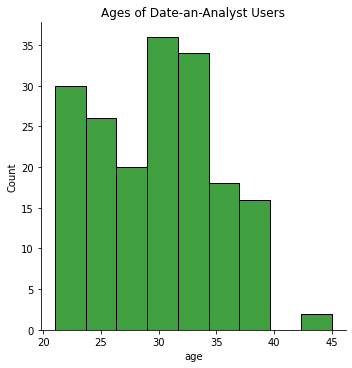

In [36]:
# use a histogram to visualize the distribution of all of the ages in our dataset
age = new_df["age"]
sns.displot(age, color="green")
plt.title("Ages of Date-an-Analyst Users")
print("This histogram shows the relative amounts of Date-an-Analysts users with each age. The ages range from 21 years old to 45 years olds centered at around 32 years old. The distribution is also approximately normal.")
plt.show()

In [25]:
# let’s see if there is a relationship between a user’s age and their location.
location_mean_age = new_df.groupby("location").age.mean()
print(location_mean_age)

location
rural    31.142857
urban    29.609195
Name: age, dtype: float64


Users in rural locations tend to be older. The average rural age is about 31.1, while the average urban age is about 29.6.


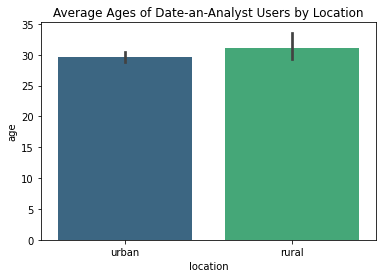

In [37]:
# visualize the means using a barplot:
plt.close()
sns.barplot(data=new_df, x="location", y="age", palette="viridis")
plt.title("Average Ages of Date-an-Analyst Users by Location")
print("Users in rural locations tend to be older. The average rural age is about 31.1, while the average urban age is about 29.6.")
plt.show()

A violin plot shows distributions of age like a histogram, but creates separate distributions for each category. It appears that age is evenly distributed in urban areas between 20 and 40, whereas age is concentrated around 30 in rural areas.


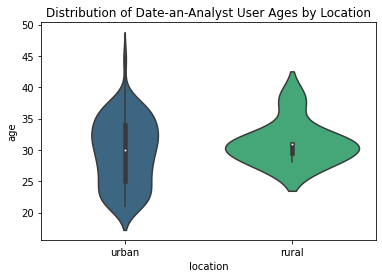

In [38]:
"""
Other visualizations provide other information about the relationship between age and location. For example, a violin plot shows distributions of age like a histogram, but creates separate distributions for each category.
"""
plt.close()
sns.violinplot(x="location", y="age", data=new_df, palette="viridis")
plt.title("Distribution of Date-an-Analyst User Ages by Location")
print("A violin plot shows distributions of age like a histogram, but creates separate distributions for each category. It appears that age is evenly distributed in urban areas between 20 and 40, whereas age is concentrated around 30 in rural areas.")
plt.show()